<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/week_39/TidyTuesday_Everest_Expedition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
################
##READ IN DATA##
################

expeditions = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-22/expeditions.csv')
peaks = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-22/peaks.csv')

# Filter to only Everest
df_everest = expeditions[expeditions['peak_id'] == 'EVER']

########################################
##REDUCE NUMBER OF TERMINATION REASONS##
########################################

# Dictionary to replace values in termination reason column
termination_reason_dict = {'Success (subpeak)':'Success',
                           'Success (main peak)':'Success',
                           'Success (claimed)':'Success',
                           'Bad weather (storms, high winds)':'Bad weather or conditions',
                           'Bad conditions (deep snow, avalanching, falling ice, or rock)':'Bad weather or conditions',
                           'Accident (death or serious injury)':'Accident (death or serious injury)',
                           'Route technically too difficult, lack of experience, strength, or motivation':'Route technically too difficult, lack of experience, strength, or motivation',
                           'Lack (or loss) of supplies or equipment':'Lack (or loss) of supplies or equipment',
                           'Lack of time':'Lack of time',
                           'Illness, AMS, exhaustion, or frostbite':'Illness, AMS, exhaustion, or frostbite',
                           'Other':'Other',
                           'Did not attempt climb':'Other',
                           'Attempt rumoured':'Other',
                           'Unknown':'Other',
                           'Did not reach base camp':'Other'}

# Replace values in df using above dict
df_everest = df_everest.replace({'termination_reason':termination_reason_dict})

# Group by the year and termination reason. Count aggregates. Pull one column that contains the count.
df_everest_count = df_everest.groupby(['year', 'termination_reason']).count().reset_index()[['year', 'termination_reason', 'expedition_id']]

# ########################
# ##HANDLE MISSING YEARS##
# ########################

## Need a df that have each termination for each year, even if the count is zero. ##

# All the years and termination reasons
all_years = np.arange(1921, 2020)
num_termination_reasons = len(set(termination_reason_dict.values())) 

# Repeat the array of years for as many termination reasons
years_for_df = np.repeat(all_years, num_termination_reasons)

# Repeat the list of termination reasons for as many years there are
termination_reasons_for_df = list(set(termination_reason_dict.values())) * len(all_years)

# Build a dummy df
dummy_df = pd.DataFrame({'year':years_for_df,
                         'termination_reason':termination_reasons_for_df})

# Left join the dummy data and real data. Get NA for rows not found in real data. Replace NA with zero
df_everest_plot = dummy_df.merge(df_everest_count, on = ['year', 'termination_reason'], how= 'left')
df_everest_plot['expedition_id'] = df_everest_plot['expedition_id'].fillna(0)


df_everest_plot.head()

,year,termination_reason,expedition_id
0,1921,Lack (or loss) of supplies or equipment,0.0
1,1921,Bad weather or conditions,0.0
2,1921,Other,1.0
3,1921,Lack of time,0.0
4,1921,Success,0.0


**Create list of counts for each termination reason.**

In [5]:
# Count of each termination reason for each year

other_count = df_everest_plot[df_everest_plot['termination_reason'] == 'Other']['expedition_id'].values
bad_weather_conditions_count = df_everest_plot[df_everest_plot['termination_reason'] == 'Bad weather or conditions']['expedition_id'].values
accident_count = df_everest_plot[df_everest_plot['termination_reason'] == 'Accident (death or serious injury)']['expedition_id'].values
difficult_count = df_everest_plot[df_everest_plot['termination_reason'] == 'Route technically too difficult, lack of experience, strength, or motivation']['expedition_id'].values
supplies_count = df_everest_plot[df_everest_plot['termination_reason'] == 'Lack (or loss) of supplies or equipment']['expedition_id'].values
time_count = df_everest_plot[df_everest_plot['termination_reason'] == 'Lack of time']['expedition_id'].values
sick_count = df_everest_plot[df_everest_plot['termination_reason'] == 'Illness, AMS, exhaustion, or frostbite']['expedition_id'].values
success_count = df_everest_plot[df_everest_plot['termination_reason'] == 'Success']['expedition_id'].values

# Array of years
all_years = np.arange(1921, 2020)

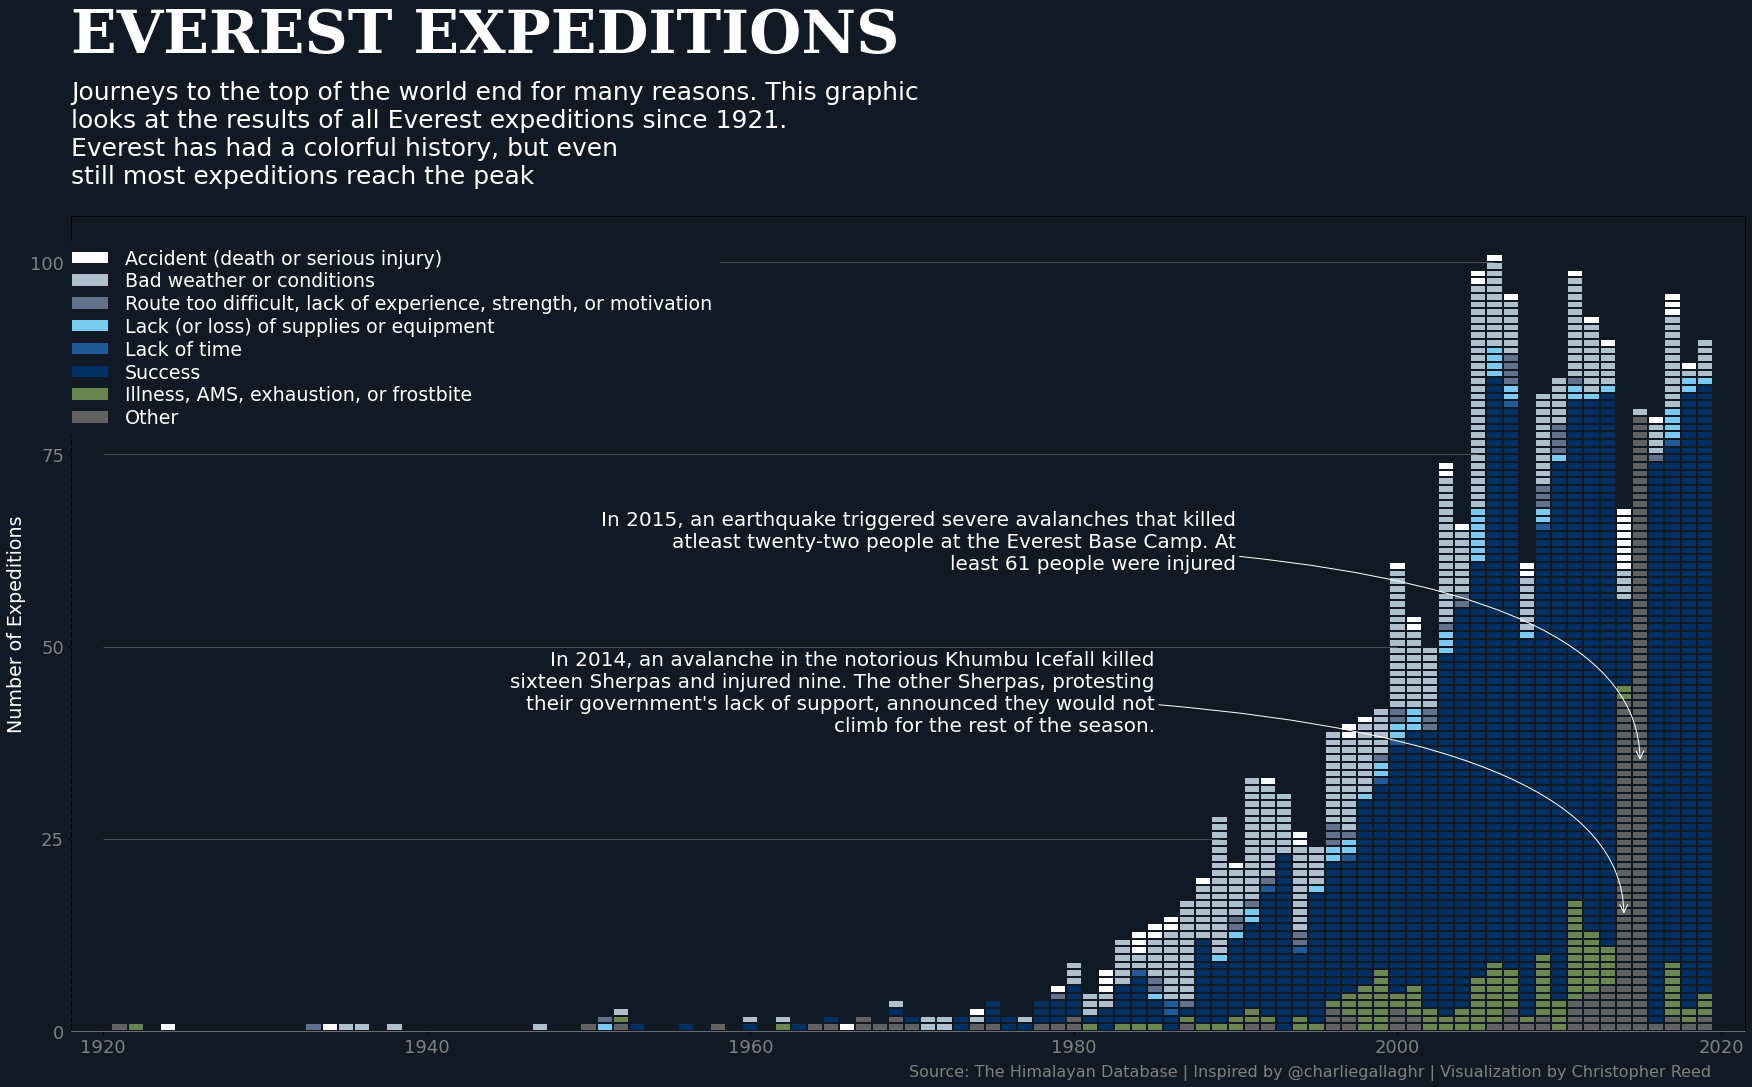

In [236]:
termination_palette = {'accident':'#ffffffff',
                       'bad_weather':'#aec0ceff',
                       'difficult':'#62728cff',
                       'supplies':'#7acbefff',
                       'time':'#225997ff',
                       'success':'#003062ff',
                       'sick':'#6a8550ff',
                       'other':'#626262ff',
                       'facecolor':'#101924ff'}


fig, ax = plt.subplots(figsize = (30,15))

#####################
##STACKED BAR PLOTS##
#####################

# Other
ax.bar(all_years, other_count,
       edgecolor = termination_palette['facecolor'], linewidth = 2, width = 1.0, color = termination_palette['other'],
       zorder = 4, label = 'Other')

# Sick
ax.bar(all_years, sick_count,
       bottom = other_count,
       edgecolor = termination_palette['facecolor'], linewidth = 2, width = 1.0, color = termination_palette['sick'],
       zorder = 4, label = 'Illness, AMS, exhaustion, or frostbite')

# Success
ax.bar(all_years, success_count,
       bottom = other_count + sick_count,
       edgecolor = termination_palette['facecolor'], linewidth = 2, width = 1.0, color = termination_palette['success'],
       zorder = 4, label = 'Success')

# Lack of time
ax.bar(all_years, time_count,
       bottom = other_count + sick_count + success_count,
       edgecolor = termination_palette['facecolor'], linewidth = 2, width = 1.0, color = termination_palette['time'],
       zorder = 4, label = 'Lack of time')

# Lack of supplies
ax.bar(all_years, supplies_count,
       bottom = other_count + sick_count + success_count + time_count,
       edgecolor = termination_palette['facecolor'], linewidth = 2, width = 1.0, color = termination_palette['supplies'],
       zorder = 4, label = 'Lack (or loss) of supplies or equipment')

# Technically difficult
ax.bar(all_years, difficult_count,
       bottom = other_count + sick_count + success_count + time_count + supplies_count,
       edgecolor = termination_palette['facecolor'], linewidth = 2, width = 1.0, color = termination_palette['difficult'],
       zorder = 4, label = 'Route too difficult, lack of experience, strength, or motivation')

# Bad weather or conditions
ax.bar(all_years, bad_weather_conditions_count,
       bottom = other_count + sick_count + success_count + time_count + supplies_count + difficult_count,
       edgecolor = termination_palette['facecolor'], linewidth = 2, width = 1.0, color = termination_palette['bad_weather'],
       zorder = 4, label = 'Bad weather or conditions')

# Accident
ax.bar(all_years, accident_count,
       bottom = other_count + sick_count + success_count + time_count + supplies_count + difficult_count + bad_weather_conditions_count,
       edgecolor = termination_palette['facecolor'], linewidth = 2, width = 1.0, color = termination_palette['accident'],
       zorder = 4, label = 'Accident (death or serious injury)')

##########
##TITLES##
##########

# Main title
ax.text(0.00, 1.2, 'EVEREST EXPEDITIONS', transform = ax.transAxes, fontsize = 60, color = 'white', family = 'serif', weight = 'bold', ha = 'left')

# Subtitle
subtitle = """Journeys to the top of the world end for many reasons. This graphic
looks at the results of all Everest expeditions since 1921.
Everest has had a colorful history, but even
still most expeditions reach the peak"""

ax.text(0.00, 1.04, subtitle, transform = ax.transAxes, fontsize = 25, color = 'white', ha = 'left')

###################
##TICK FORMATTING##
###################

ax.set_yticks(np.arange(0,125,25))
ax.tick_params(axis = 'both', labelcolor = 'grey', labelsize = 18)

##############
##AXIS LABEL##
##############

ax.set_ylabel('Number of Expeditions', fontsize = 19, color = 'white')

###########
##MARGINS##
###########
plt.margins(x = 0.02)

#############
##GRIDLINES##
#############

# Create block style appearance by plotting horizontal lines
for i in np.arange(1,101):
    ax.axhline(i,0,1, color = termination_palette['facecolor'], linewidth = 2, zorder = 5)

ax.spines['bottom'].set_color('grey')
ax.hlines(y = 25, xmin = 1920, xmax = 1989, color = 'grey', linewidth = 0.5, zorder = 6)
ax.hlines(y = 50, xmin = 1920, xmax = 2000, color = 'grey', linewidth = 0.5, zorder = 6)
ax.hlines(y = 75, xmin = 1920, xmax = 2005, color = 'grey', linewidth = 0.5, zorder = 6)
ax.hlines(y = 100, xmin = 1920, xmax = 2006, color = 'grey', linewidth = 0.5, zorder = 6)


###########
##LEGEND###
###########

# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the labels in the legend
current_positions = np.arange(0,8)
desired_order = positions[::-1]

legend = plt.legend([handles[idx] for idx in desired_order],[labels[idx] for idx in desired_order],
                    frameon = True, facecolor = termination_palette['facecolor'], edgecolor = termination_palette['facecolor'], framealpha = 1, 
                    loc = 'upper left', bbox_to_anchor = (-0.01, 0.98), prop = {'size':19},
                    labelspacing = 0.2)

# Set zorder of legend
legend.set_zorder(8)

# Change the font color
plt.setp(legend.get_texts(), color = 'white')

###############
##ANNOTATIONS##
###############

annot1 = """In 2015, an earthquake triggered severe avalanches that killed
atleast twenty-two people at the Everest Base Camp. At
least 61 people were injured"""

annot2 = """In 2014, an avalanche in the notorious Khumbu Icefall killed
sixteen Sherpas and injured nine. The other Sherpas, protesting
their government's lack of support, announced they would not
climb for the rest of the season."""

ax.annotate(annot1,
            xy = (2015, 35), xycoords = 'data',
            xytext = (1990, 60), textcoords = 'data',
            ha = 'right', fontsize = 20, color = 'white', zorder = 10,
            arrowprops = dict(arrowstyle = "->",
                              connectionstyle = "angle 3, angleA = 0, angleB = 90",
                              color = 'white'))

ax.annotate(annot2,
            xy = (2014, 15), xycoords = 'data',
            xytext = (1985, 39), textcoords = 'data',
            ha = 'right', fontsize = 20, color = 'white', zorder = 10,
            arrowprops = dict(arrowstyle = "->",
                              connectionstyle = "angle 3, angleA = 0, angleB = 90",
                              color = 'white'))
###########
##CAPTION##
###########

caption = 'Source: The Himalayan Database | Inspired by @charliegallaghr | Visualization by Christopher Reed'
ax.text(0.98, -0.055, caption, fontsize = 16, transform = ax.transAxes, ha = 'right', color = 'grey')

#############
##FACECOLOR##
#############

ax.set_facecolor(termination_palette['facecolor'])
fig.set_facecolor(termination_palette['facecolor'])


# plt.tight_layout()
plt.savefig('everest_expeditions2.jpg', facecolor = termination_palette['facecolor'], bbox_inches = 'tight')